In [1]:
# import functions
# OS interaction and time
import os
import sys
import cftime
import datetime
import time
import glob
import dask
import dask.bag as db
import calendar

# math and data
import numpy as np
import netCDF4 as nc
import xarray as xr
import scipy as sp
import pandas as pd
import pickle as pickle
from sklearn import linear_model
import matplotlib.patches as mpatches
from shapely.geometry.polygon import LinearRing
import statsmodels.stats.multitest as multitest

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.axes_divider import HBoxDivider
import mpl_toolkits.axes_grid1.axes_size as Size
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

# random
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

In [2]:
data_in_path = '/glade/u/home/zcleveland/scratch/ERA5/dsw/' # path to subsetted data
fig_out_path = '/glade/u/home/zcleveland/NAM_soil-moisture/ERA5_analysis/figures/' # path to generated figures

In [3]:
# variable list to choose
var_list = [
    'lsp', # large scale precipitation (m of water) - accumu
    'cp', # convective precipitation (m of water) - accumu
    'tp', # total precipitation (m of water) - accumu -- DERIVED
    'sd', # snow depth  (m of water equivalent) - instan
    'msl', # mean sea level pressure (Pa) - instan
    'tcc', # total cloud cover (0-1) - instan
    'stl1', # soil temp layer 1 (K) - instan
    'stl2', # soil temp layer 2 (K) - instan
    'stl3', # soil temp layer 3 (K) - instan
    'stl4', # soil temp layer 4 (K) - instan
    'swvl1', # soil volume water content layer 1 (m^3 m^-3) - instan
    'swvl2', # soil volume water content layer 2 (m^3 m^-3) - instan
    'swvl3', # soil volume water content layer 3 (m^3 m^-3) - instan
    'swvl4', # soil volume water content layer 4 (m^3 m^-3) - instan
    '2t', # 2 meter temp (K) - instan
    '2d', # 2 meter dew point (K) - instan
    'ishf', # instant surface heat flux (W m^-2) - instan
    'ie', # instant moisture flux (kg m^-2 s^-1) - instan
    'sshf', # surface sensible heat flux (J m^-2) - accumu
    'slhf', # surface latent heat flux (J m^-2) - accumu
    'ssr', # surface net solar radiation (J m^-2) - accumu
    'str', # surface net thermal radiation (J m^-2) - accumu
    'sro', # surface runoff (m) - accumu
    'sf', # total snowfall (m of water equivalent) - accumu
    'cape', # convective available potential energy (J kg^-1) - instan
    'tcw', # total column water (kg m^-2) - sfc (sum total of solid, liquid, and vapor in a column)
]

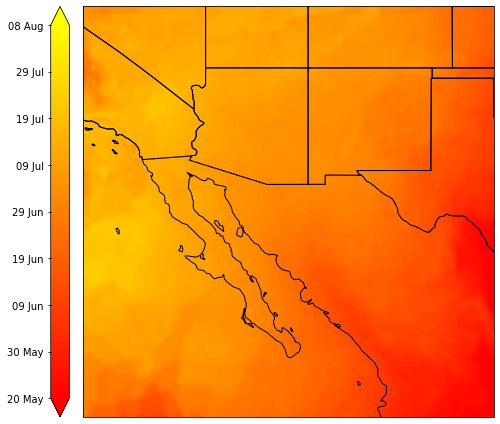

In [4]:
# plot mean onset
# open datasets for plotting
ds = xr.open_dataset(os.path.join(data_in_path, 'NAM_onset_mean.nc'))
da = ds['dayofyear']

# plot
# set projection and subplot details
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# set levels and ticks for plotting
v_min = 140
v_max = 220
cf_levels = np.arange(v_min, v_max+1, 1)

# plot the data using contourf
cf = ax.contourf(da.longitude, da.latitude, da,
                 cmap='autumn', levels=cf_levels, vmin=v_min, vmax=v_max, extend='both')

# add coastlines, state borders, and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES)

# create custom array for color bar ticks
date_range = pd.date_range(start='2001-01-01', end='2001-12-31')
date_array = date_range.to_numpy()

# create array of every 10th ordinal day for ticks
cf_ticks = np.arange(v_min, v_max+1, 10)
# create array of dates corresponding to tick values (ordinal days)
cf_date_ticks = [(pd.to_datetime(date_array[cf_levels[i]-1]).strftime('%d %b')) for i in range(len(cf_levels)) if cf_levels[i]%10==0]

cbar = plt.colorbar(cf, ax=ax, ticks=cf_ticks, location='left',
                    format=ticker.FixedFormatter(cf_date_ticks), pad=0.02)
# cbar.set_label('Ordinal Day')

# add title and others
# plt.title(f'Average Onset Day of the NAM', fontsize=18)
plt.tight_layout()
# plt.savefig(f'{fig_out_path}low-res/onset_day_mean.png', dpi=300, bbox_inches='tight')
# plt.savefig(f'{fig_out_path}high-res/onset_day_mean.png', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

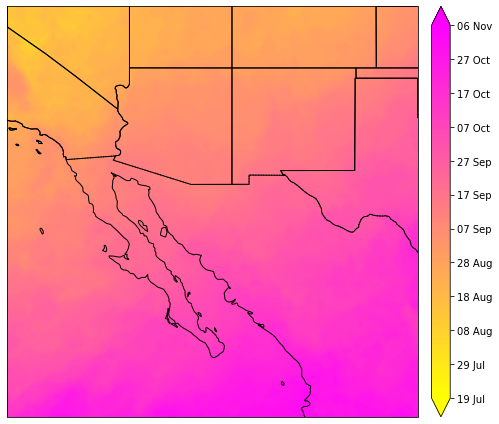

In [5]:
# plot mean retreat
# open datasets for plotting
ds = xr.open_dataset(os.path.join(data_in_path, 'NAM_retreat_mean.nc'))
da = ds['dayofyear']

# plot
# set projection and subplot details
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# set levels and ticks for plotting
v_min = 200
v_max = 310
cf_levels = np.arange(v_min, v_max+1, 1)

# plot the data using contourf
cf = ax.contourf(da.longitude, da.latitude, da,
                 cmap='spring_r', levels=cf_levels, vmin=v_min, vmax=v_max, extend='both')

# add coastlines, state borders, and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES)

# create custom array for color bar ticks
date_range = pd.date_range(start='2001-01-01', end='2001-12-31')
date_array = date_range.to_numpy()

# create array of every 10th ordinal day for ticks
cf_ticks = np.arange(v_min, v_max+1, 10)
# create array of dates corresponding to tick values (ordinal days)
cf_date_ticks = [(pd.to_datetime(date_array[cf_levels[i]-1]).strftime('%d %b')) for i in range(len(cf_levels)) if cf_levels[i]%10==0]

cbar = plt.colorbar(cf, ax=ax, ticks=cf_ticks,
                    format=ticker.FixedFormatter(cf_date_ticks), pad=0.02)
# cbar.set_label('Ordinal Day')

# add title and others
# plt.title(f'Average Retreat Day of the NAM', fontsize=18)
plt.tight_layout()
# plt.savefig(f'{fig_out_path}low-res/retreat_day_mean.png', dpi=300, bbox_inches='tight')
# plt.savefig(f'{fig_out_path}high-res/retreat_day_mean.png', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

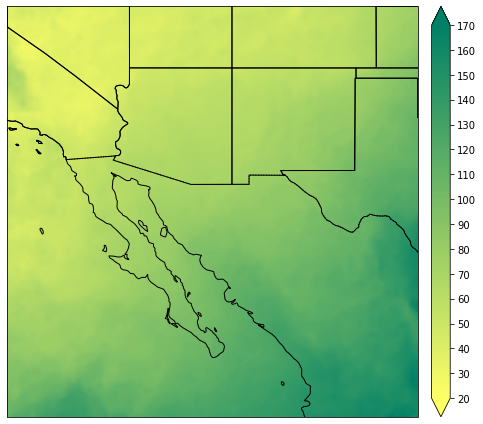

In [12]:
# plot the length of NAM: retreat - onset
# open onset dataset
ds = xr.open_dataset(os.path.join(data_in_path, 'NAM_length_mean.nc'))
da = ds['dayofyear']

# plot
# set projection and subplot details
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# set levels and ticks for plotting
v_min = 20
v_max = 170
cf_levels = np.arange(v_min, v_max+1, 1)

# plot the data using contourf
cf = ax.contourf(da.longitude, da.latitude, da,
                 cmap='summer_r', levels=cf_levels, vmin=v_min, vmax=v_max, extend='both')

# add coastlines, state borders, and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES)

# create array for ticks
cf_ticks = np.arange(v_min, v_max+1, 10)

# set color bar
cbar = plt.colorbar(cf, ax=ax, ticks=cf_ticks, pad=0.02)

# add title and others
# plt.title(f'Average Length Day of the NAM', fontsize=18)
plt.tight_layout()
# plt.savefig(f'{fig_out_path}low-res/NAM_length_mean.png', dpi=300, bbox_inches='tight')
# plt.savefig(f'{fig_out_path}high-res/NAM_length_mean.png', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

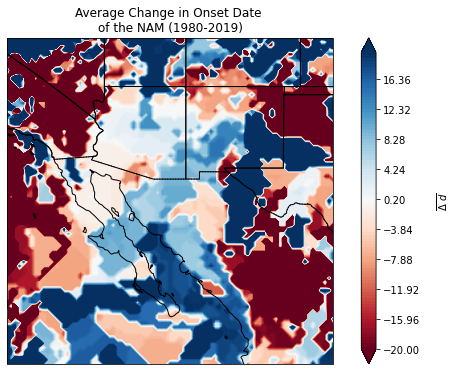

In [9]:
# plot the onset trend
ds = xr.open_dataset(os.path.join(data_in_path, 'onset_mean_gradient.nc'))
da = ds['dayofyear']
onset_change = da*39

# set projection and subplot details
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# v_min = np.floor(onset_change.min())
# v_max = np.ceil(onset_change.max())
v_min = -20
v_max = 20

# set levels and ticks for plotting
levels = np.linspace(v_min, v_max, 100)

# plot the data using contourf
cf = ax.contourf(onset_change.longitude, onset_change.latitude, onset_change,
                  cmap='RdBu', levels=levels, vmin=v_min, vmax=v_max, extend='both')

# add coastlines, state borders, and other features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES)

# add colorbar and ticks
cbar = plt.colorbar(cf, ax=ax)
cbar.set_label(r'$\overline{\Delta\ d}$', rotation=90, labelpad=15)

# add title and others
plt.title(f'Average Change in Onset Date \nof the NAM (1980-2019)')
# plt.savefig(f'{fig_out_path}onset_change.png', dpi=300)
plt.show()
plt.close()

In [ ]:
onset = xr.open_dataset(os.path.join(data_in_path, 'NAM_onset.nc'))['date'].dt.dayofyear
onset_grad = xr.open_dataset(os.path.join(data_in_path, 'onset_gradient.nc'))['dayofyear']
onset_grad_mean = xr.open_dataset(os.path.join(data_in_path, 'onset_mean_gradient.nc'))['dayofyear']
old_onset = xr.open_dataset(os.path.join(data_in_path, 'old', 'NAM_onset.nc'))['date'].dt.dayofyear
old_onset_grad = xr.open_dataset(os.path.join(data_in_path, 'old', 'onset_gradient.nc'))['dayofyear']
old_onset_grad_mean = xr.open_dataset(os.path.join(data_in_path, 'old', 'onset_mean_gradient.nc'))['dayofyear']